# Settings

In [1]:
!pip install japanize_matplotlib

     |████████████████████████████████| 4.1MB 2.9MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.2-cp36-none-any.whl size=4120191 sha256=209f932ef6461f65b6a51e06d9b5327a435108a87b8ad75edff840836ca39d8b
  Stored in directory: /root/.cache/pip/wheels/9c/f9/fc/bc052ce743a03f94ccc7fda73d1d389ce98216c6ffaaf65afc
Successfully built japanize-matplotlib


In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import japanize_matplotlib
from scipy import stats
from numpy.random import randn
import copy

# Least squares method

In [0]:
def min_sq(x, y):
  x_bar, y_bar = np.mean(x), np.mean(y)
  beta_1 = np.dot(x-x_bar, y-y_bar) / np.linalg.norm(x-x_bar)**2
  beta_0 = y_bar - beta_1*x_bar
  return [beta_1, beta_0]

In [0]:
N = 100
a = np.random.normal(loc=2, scale=1, size=N)
b = randn(1)
x = randn(N)
y = a*x + b + randn(N)
a1, b1 = min_sq(x, y)

In [0]:
# centralization
xx = x - np.mean(x); yy = y - np.mean(y)
a2, b2 = min_sq(xx, yy)

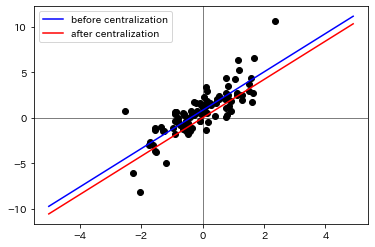

In [6]:
x_seq = np.arange(-5, 5, 0.1)
y_pre = x_seq * a1 + b1
yy_pre = x_seq * a2 + b2

plt.scatter(x, y, c='black')
plt.axhline(y=0, c='black', linewidth=0.5)
plt.axvline(x=0, c='black', linewidth=0.5)
plt.plot(x_seq, y_pre, c='blue', label='before centralization')
plt.plot(x_seq, yy_pre, c='red', label='after centralization')
plt.legend(loc='upper left')
plt.show()

# Multiple Regression


In [8]:
n = 100; p = 2
beta = np.array([1, 2, 3])
x = randn(n, 2)
y = beta[0] + beta[1] * x[:, 0] + beta[2] * x[:, 1] + randn(n)
X = np.insert(x, 0, 1, axis=1)
# estimate beta
np.linalg.inv(X.T@X)@X.T@y

array([1.0852874 , 2.06124143, 3.0326861 ])

# Chi-Square Distribution

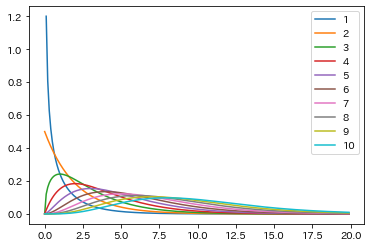

In [11]:
x = np.arange(0, 20, 0.1)
for i in range(1, 11):
  plt.plot(x, stats.chi2.pdf(x, i), label='{}'.format(i))
plt.legend(loc='upper right')

# Compare Student's t-distribution with Gaussian Distribution

Text(0.5, 1.0, 'How the t-distribution changes with degrees of freedom')

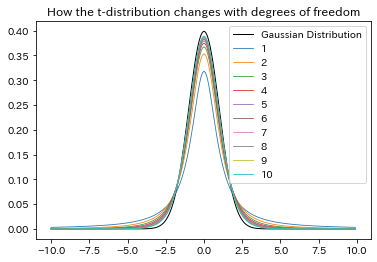

In [12]:
x = np.arange(-10, 10, 0.1)
plt.plot(x, stats.norm.pdf(x, 0, 1), label='Gaussian Distribution', c='black', linewidth=1)
for i in range(1, 11):
  plt.plot(x, stats.t.pdf(x, i), label='{}'.format(i), linewidth=0.8)
plt.legend(loc='upper right')
plt.title('How the t-distribution changes with degrees of freedom')

# β0 and β1 estimation (p=1, N=100)

Text(0, 0.5, 'beta_1')

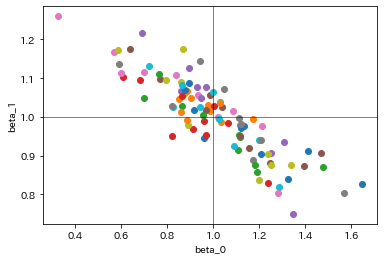

In [13]:
N = 100; p = 1
iter_num = 100
for i in range(iter_num):
  x = randn(N) + 2
  e = randn(N)
  y = x + 1 + e
  b_1, b_0 = min_sq(x, y)
  plt.scatter(b_0, b_1)
plt.axhline(y=1.0, c='black', linewidth=0.5)
plt.axvline(x=1.0, c='black', linewidth=0.5)
plt.xlabel('beta_0')
plt.ylabel('beta_1')

# Test for null hypotheses H0: βj=0, and alternative hypotheses H1: βj≠0

## scratch

In [0]:
N = 100
x = randn(N); y = randn(N)
beta_1, beta_0 = min_sq(x, y)

RSS = np.linalg.norm(y - beta_0 - beta_1 * x)**2
RSE = np.sqrt(RSS / (N - 1 - 1))

B_0 = (x.T@x / N) / np.linalg.norm(x - np.mean(x))**2
B_1 = 1 / np.linalg.norm(x - np.mean(x))**2

se_0 = RSE * np.sqrt(B_0)
se_1 = RSE * np.sqrt(B_1)

t_0 = beta_0 / se_0
t_1 = beta_1 / se_1

p_0 = 2 * (1 - stats.t.cdf(np.abs(t_0), N-2))
p_1 = 2 * (1 - stats.t.cdf(np.abs(t_1), N-2))

In [15]:
# Intersept
beta_0, se_0, t_0, p_0

(0.02117612787691824,
 0.10033894827845562,
 0.21104594218140807,
 0.8332896550006055)

In [16]:
# coefficient
beta_1, se_1, t_1, p_1

(-0.122803065544986,
 0.09302983594052715,
 -1.3200395798127873,
 0.1898968631383151)

## sklearn, linear_model in Python

In [17]:
# use sklearn, linear_model
from sklearn import linear_model

reg = linear_model.LinearRegression()
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)
reg.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
# coefficient beta_1, intersept beta_0
reg.coef_, reg.intercept_

(array([[-0.12280307]]), array([0.02117613]))

## statsmodels

In [20]:
import statsmodels.api as sm
X = np.insert(x, 0, 1, axis=1)
model = sm.OLS(y, X)
res = model.fit()
print(res.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     1.743
Date:                Tue, 05 May 2020   Prob (F-statistic):              0.190
Time:                        15:32:23   Log-Likelihood:                -141.18
No. Observations:                 100   AIC:                             286.4
Df Residuals:                      98   BIC:                             291.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0212      0.100      0.211      0.8

## histgram
estimate β1 1000 times

Text(0, 0.5, 'Probability density')

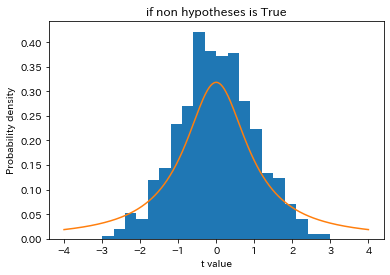

In [22]:
N = 100; r = 1000
T = []
for i in range(r):
  x = randn(N); y = randn(N)
  beta_1, beta_0 = min_sq(x, y)
  
  pre_y = beta_0 + beta_1 * x

  RSS = np.linalg.norm(y - beta_0 - beta_1 * x)**2
  RSE = np.sqrt(RSS / (N - 1 - 1))

  B_0 = (x.T@x/N) / np.linalg.norm(x - np.mean(x))**2
  B_1 = 1 / np.linalg.norm(x - np.mean(x))**2

  se_1 = RSE * np.sqrt(B_1)
  
  T.append(beta_1 / se_1)

plt.hist(T, bins=20, range=(-3, 3), density=True)
x = np.linspace(-4, 4, 400)
plt.plot(x, stats.t.pdf(x, 1))
plt.title('if non hypotheses is True')
plt.xlabel('t value')
plt.ylabel('Probability density')

Text(0, 0.5, 'Probability density')

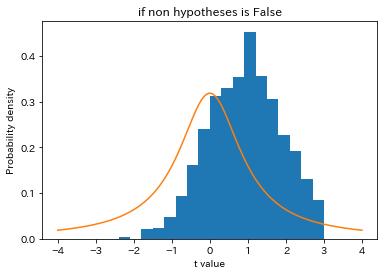

In [23]:
N = 100; r = 1000
T = []
for i in range(r):
  x = randn(N); y = 0.1 * x + randn(N)
  beta_1, beta_0 = min_sq(x, y)
  
  pre_y = beta_0 + beta_1 * x

  RSS = np.linalg.norm(y - beta_0 - beta_1 * x)**2
  RSE = np.sqrt(RSS / (N - 1 - 1))

  B_0 = (x.T@x/N) / np.linalg.norm(x - np.mean(x))**2
  B_1 = 1 / np.linalg.norm(x - np.mean(x))**2

  se_1 = RSE * np.sqrt(B_1)
  
  T.append(beta_1 / se_1)

plt.hist(T, bins=20, range=(-3, 3), density=True)
x = np.linspace(-4, 4, 400)
plt.plot(x, stats.t.pdf(x, 1))
plt.title('if non hypotheses is False')
plt.xlabel('t value')
plt.ylabel('Probability density')

# Coefficient of determination and colinearity detection

In [0]:
def R2(x, y):
  n = x.shape[0]
  xx = np.insert(x, 0, 1, axis=1)
  beta = np.linalg.inv(xx.T@xx)@xx.T@y
  
  y_hat = xx@beta
  y_bar = np.mean(y)

  # residual sum of squares
  RSS = np.linalg.norm(y - y_hat)**2
  # total sum of squares
  TSS = np.linalg.norm(y - y_bar)**2

  return 1 - RSS / TSS

In [25]:
N = 100; m = 2
x = randn(N, m)
y = randn(N)
R2(x, y)

0.011997500344455125

In [27]:
x = randn(N, 1)
y = randn(N)
R2(x, y)

0.0009515786609093357

In [28]:
xx = x.reshape(N)
np.corrcoef(xx, y)

array([[ 1.        , -0.03084767],
       [-0.03084767,  1.        ]])

In [29]:
np.corrcoef(xx, y)[0, 1]**2

0.0009515786609095196

## Variance Inflation Factor (VIF)

In [0]:
from sklearn.datasets import load_boston

In [31]:
boston = load_boston()
x = boston.data
x.shape

(506, 13)

In [0]:
def VIF(x):
  p = x.shape[1]
  values = []
  for j in range(p):
    S = list(set(range(p)) - {j})
    values.append(1 / (1 - R2(x[:, S], x[:, j])))
  return values

In [33]:
VIF(x)

[1.792191547433241,
 2.29875817874944,
 3.9915964183460297,
 1.073995327553789,
 4.393719847577495,
 1.9337444357832565,
 3.1008255128153372,
 3.9559449063727263,
 7.484496335274466,
 9.00855394759707,
 1.7990840492488995,
 1.3485210764063762,
 2.9414910780919357]

# Confidence interval and prediction interval

In [0]:
N = 100; P = 1
X = randn(N, p)
X = np.insert(X, 0, 1, axis=1)
beta = np.array([1, 1])
epsilon = randn(N)
y = X@beta + epsilon

In [0]:
U = np.linalg.inv(X.T@X)
beta_hat = U@X.T@y
RSS = np.linalg.norm(y - X@beta_hat)**2
RSE = np.sqrt(RSS / (N - p - 1))
alpha = 0.05

In [48]:
RSE, beta_hat

(1.0089696735032716, array([1.03281294, 1.07612564]))

In [0]:
def f(x, a):
  x = np.array([1, x])
  range = stats.t.ppf(0.975, df=N-p-1)*RSE*np.sqrt(a + x@U@x.T)
  lower = x@beta_hat - range
  upper = x@beta_hat + range
  return ([lower, upper])

In [50]:
stats.t.ppf(0.975, df=1)

12.706204736432095

In [0]:
x_seq = np.arange(-10, 10, 0.1)
lower_seq1 = []; upper_seq1 = []
for i in range(len(x_seq)):
  lower_seq1.append(f(x_seq[i], 0)[0]); upper_seq1.append(f(x_seq[i], 0)[1])

lower_seq2 = []; upper_seq2 = []
for i in range(len(x_seq)):
  lower_seq2.append(f(x_seq[i], 1)[0]); upper_seq2.append(f(x_seq[i], 1)[1])

yy = beta_hat[0] + beta_hat[1] * x_seq

Text(0, 0.5, 'y')

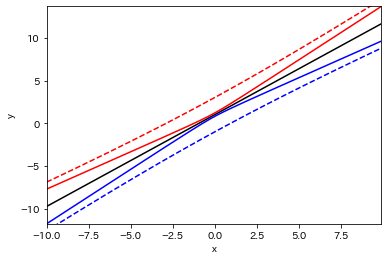

In [52]:
plt.xlim(np.min(x_seq), np.max(x_seq))
plt.ylim(np.min(lower_seq1), np.max(upper_seq1))
plt.plot(x_seq, yy, c='black')
plt.plot(x_seq, lower_seq1, c='blue')
plt.plot(x_seq, upper_seq1, c='red')
plt.plot(x_seq, lower_seq2, c='blue', linestyle='dashed')
plt.plot(x_seq, upper_seq2, c='red', linestyle='dashed')
plt.xlabel('x')
plt.ylabel('y')